<a href="https://colab.research.google.com/github/Almabette/HotelBookingAnalysis/blob/main/Copy_of_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#importing essintial libraries

In [76]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#mounting drive


In [77]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read csv file

In [78]:
#uploading csv file from google drive
df=pd.read_csv('/content/drive/MyDrive/Almabetter/HotelBookings.csv')

#Data exploration

In [79]:
#looking  for the data type and non null entites
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#show top rows and columns
df.head(5)

In [ ]:
# show bottom  rows 
df.tail()

In [82]:
#checking the shape of data
df.shape

(119390, 32)

In [83]:
#looking all the mean,std,min value . NaNvalues for mean 25%, 50%, 75%, max indicates
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [84]:
#show duplicated values
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [85]:
#Data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Data discription

###1. hotel : Hotel(Resort Hotel or City Hotel)

###2. is_canceled : Value indicating if the booking was canceled (1) or not (0)

###3. lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

###4. arrival_date_year : Year of arrival date

###5. arrival_date_month : Month of arrival date

###6. arrival_date_week_number : Week number of year for arrival date

###7. arrival_date_day_of_month : Day of arrival date

###8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

###9. stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

###10. adults : Number of adults

###11. children : Number of children

###12. babies : Number of babies

###13. meal : Type of meal booked. Categories are presented in standard hospitality meal packages:BB(Bead and Breakfast) HB(Half board - Breakfast and dinner) FB(Full board - Breakfast-lunch-dinner) SF(Self catering)

###14. country : Country of origin.`

###15. market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

###16. distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

###17. is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

###18. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

###19.previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

###20. reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

###21. assigned_room_type : Code for the type of room assigned to the booking.

###22. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

###23. deposit_type : Indication on if the customer made a deposit to guarantee the booking.

###24. agent : ID of the travel agency that made the booking

###25. company : ID of the company/entity that made the booking or responsible for paying the booking.

###26. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

###27. customer_type : Type of booking, assuming one of four categories

###28. adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

###29. required_car_parking_spaces : Number of car parking spaces required by the customer

###30. total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed or high floor)*

###31. reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
###32. reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


#Data Cleaning

In [86]:
#looking the non null entitis
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#Droping  coumns

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [88]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#problem 1



the best time of year to a book a hotel room is?



In [89]:
#import metplotlib inline
%matplotlib inline

In [90]:
def month_as_numbers(arrival_date_month):
   month_as_numbers = 0
   if arrival_date_month ==  'January':
     month_as_numbers = 1
   elif arrival_date_month ==  'February':
     month_as_numbers = 2
   elif arrival_date_month ==  'March':
     month_as_numbers = 3
   elif arrival_date_month ==  'April':
     month_as_numbers = 4
   elif arrival_date_month ==  'May':
     month_as_numbers = 5
   elif arrival_date_month ==  'June':
     month_as_numbers = 6
   elif arrival_date_month ==  'July':
     month_as_numbers = 7
   elif arrival_date_month ==  'August':
     month_as_numbers = 8
   elif arrival_date_month ==  'September':
     month_as_numbers = 9
   elif arrival_date_month ==  'October':
     month_as_numbers = 10
   elif arrival_date_month ==  'November':
     month_as_numbers = 11  
   elif arrival_date_month ==  'December':
     month_as_numbers = 12   
   return  month_as_numbers

In [91]:
df['month_as_numbers'] = df.apply(lambda x: month_as_numbers(x['arrival_date_month']),axis=1)

In [92]:
hotel_booking_year1 =df.groupby(['arrival_date_year',  'month_as_numbers'])['arrival_date_year'].count().unstack()

In [93]:
#selected year of hotel booking
hotel_booking_year1

month_as_numbers,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,2776.0,3889.0,5114.0,4957.0,2340.0,2920.0
2016,2248.0,3891.0,4824.0,5428.0,5478.0,5292.0,4572.0,5063.0,5394.0,6203.0,4454.0,3860.0
2017,3681.0,4177.0,4970.0,5661.0,6313.0,5647.0,5313.0,4925.0,NaN,NaN,NaN,NaN


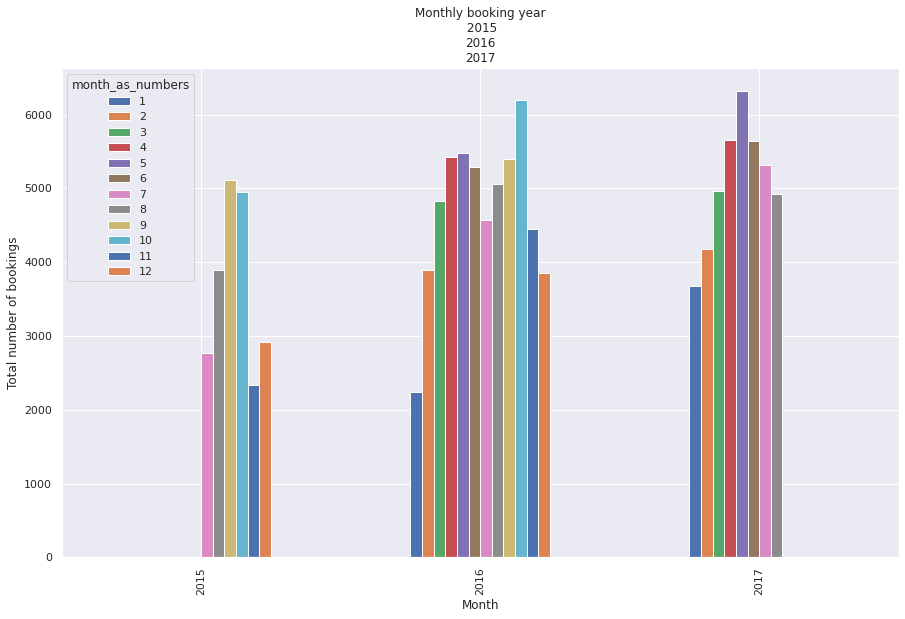

In [94]:
#graphical Presentation of monthly booking in selected years
hotel_booking_year1.plot(kind='bar',  figsize=(15,9))
plt.title('Monthly booking year\n 2015\n2016\n2017')
plt.ylabel('Total number of bookings')
plt.xlabel('Month')
plt.show()

#Observation
In the above graph total number of bookins has been displayed monthwise for each year and he hightst bokkings happened in  year 2016  

In [95]:
#Monthly Enagament of hotel booking
monthly_enagament=df['arrival_date_month'].value_counts()


In [96]:
#use type of libraris
type(monthly_enagament)

pandas.core.series.Series

In [97]:
#sorting
monthly_enagament.sort_index(inplace=True)

In [98]:
monthly_enagament

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

In [25]:
monthly_enagament.shape

(12,)

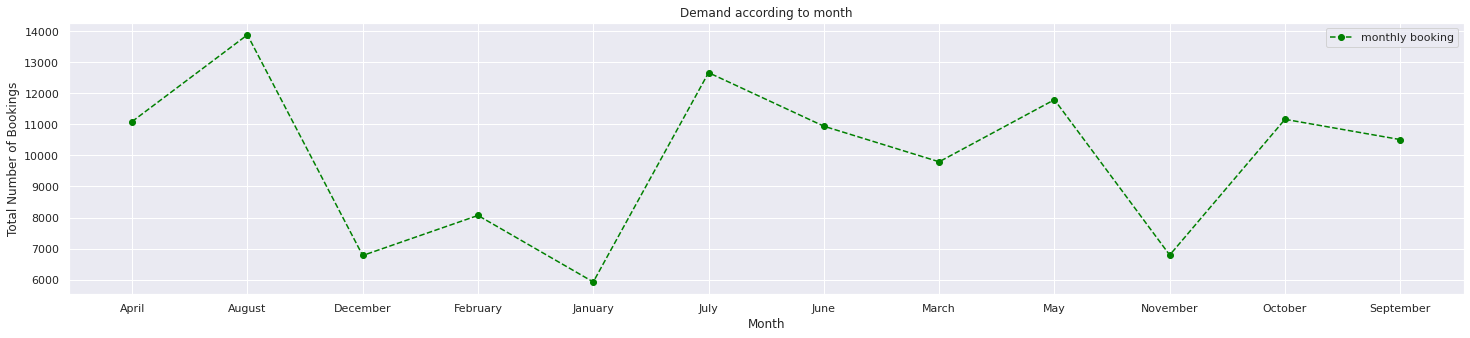

In [99]:
#Graphical represtaion of Monthly changes in demand of hotel booking
plt.figure(figsize=(25,5))
plt.plot(monthly_enagament,
        color='green',
         marker='o',
         linestyle='dashed',
         label='monthly booking')
plt.title('Demand according to month')
plt.ylabel('Total Number of Bookings')
plt.xlabel('Month')
plt.legend()
plt.show()


#Problem
##what if you  wanted predictwhether or not a hotel was likely to receive a disproportionately high number of special requests ? 

In [100]:
#value count
account_high_request=df['arrival_date_month'].value_counts()

In [101]:
#sorting
account_high_request.sort_index(inplace=True)

##below counplot show the special request accordig to month

Text(0.5, 1.0, 'special request according to month')

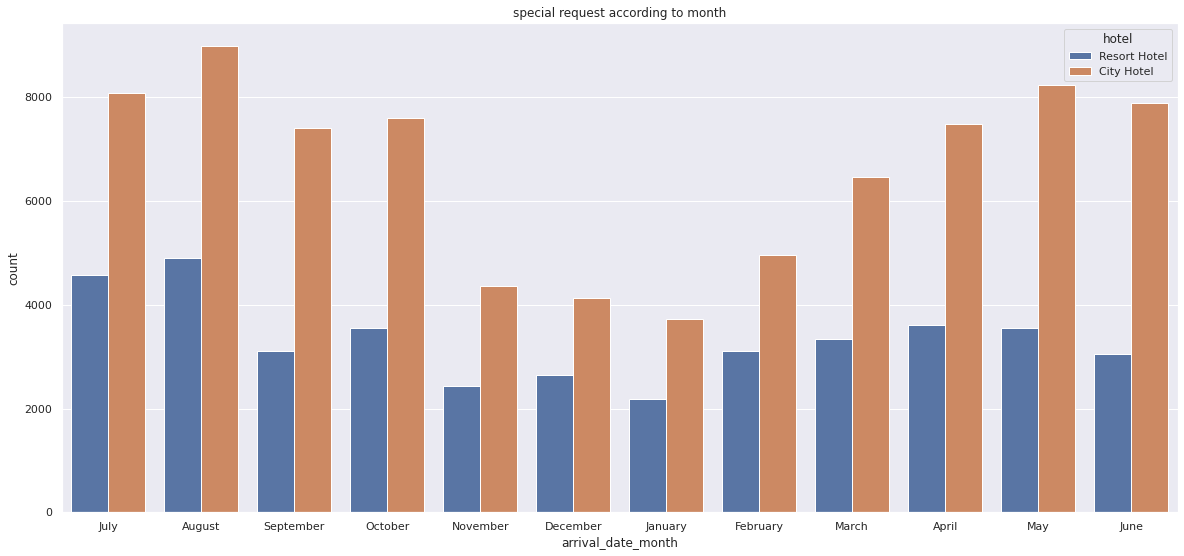

In [102]:
plt.figure(figsize=(20,9))

sns.countplot(x=df['arrival_date_month'],hue=df['hotel'])
plt.title('special request according to month')

#Problem

##what is the precntage of cancellation in city hotel and resort hotel?

##Below countplot show the average percentage of cancelation in city hotel and resort hotel

Text(0, 0.5, 'Reservation Count')

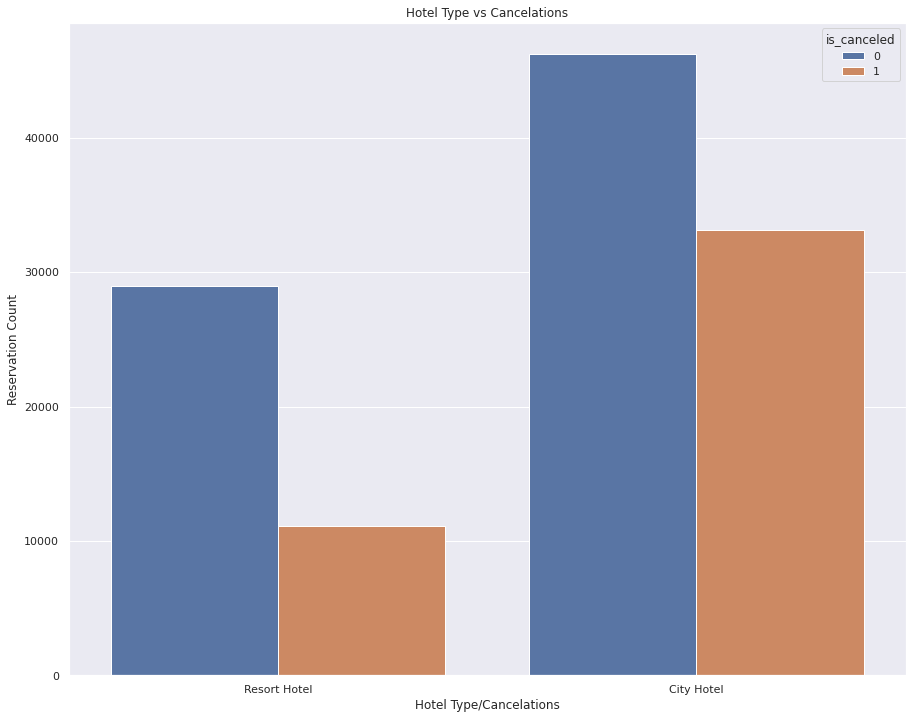

In [103]:
#use countplot
sns.set(rc={'figure.figsize':(15,12)})
graph=sns.countplot(x='hotel',hue='is_canceled',data=df)
graph.set(title='Hotel Type vs Cancelations')
graph.set_xlabel("Hotel Type/Cancelations",fontsize=12)
graph.set_ylabel("Reservation Count",fontsize=12)

In [104]:
from locale import normalize
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

##Observation
these  countplot show that total 37% people were cenceled in booking city or resort hotel and 63% custmer not canceled in booking city and resort hotel

##What type of meal required in hotel?


###below countplot show the diffrent type of food is provided by hotel

Text(0, 0.5, 'Count')

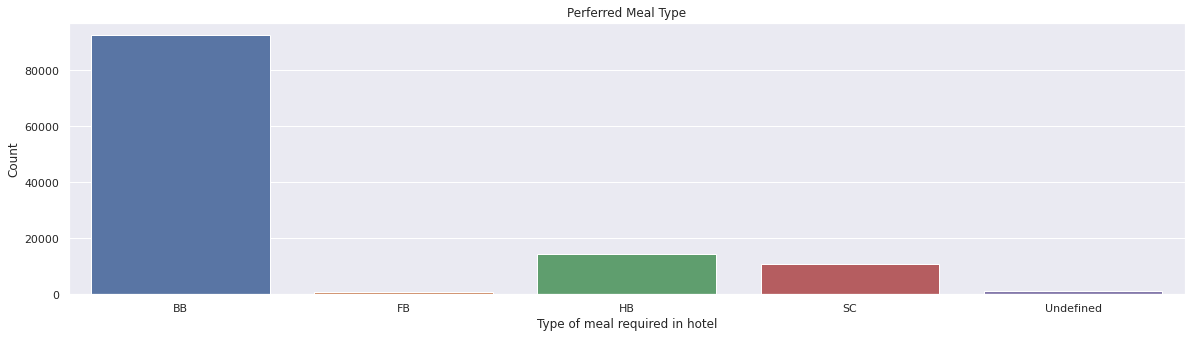

In [105]:
#use countplot
plt.figure(figsize=(20,5))
sns.countplot(x=df['meal'])
plt.title('Perferred Meal Type')
plt.xlabel('Type of meal required in hotel')
plt.ylabel('Count')

In [106]:
df['meal'].value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

above countplot show the diffrent type of meal in hotel and percentage of meal
##Type of meal
###BB(bead and breakfast)=77%
###FB(full board) breakfast+lunch+dinner+other meal=0.66%
###HB(half board) brekfast+diner  =12%
###SC(self catering)  = 8%
###undefied  = 1%

#Observation
##So the most preferred meal type by the gusets is :
# BB(bead and breakfast)


#Problem
##what is the customer that special reservation status ?


##below countplot  show that  customer reservation status in hotel

Text(0, 0.5, 'Reservation Count')

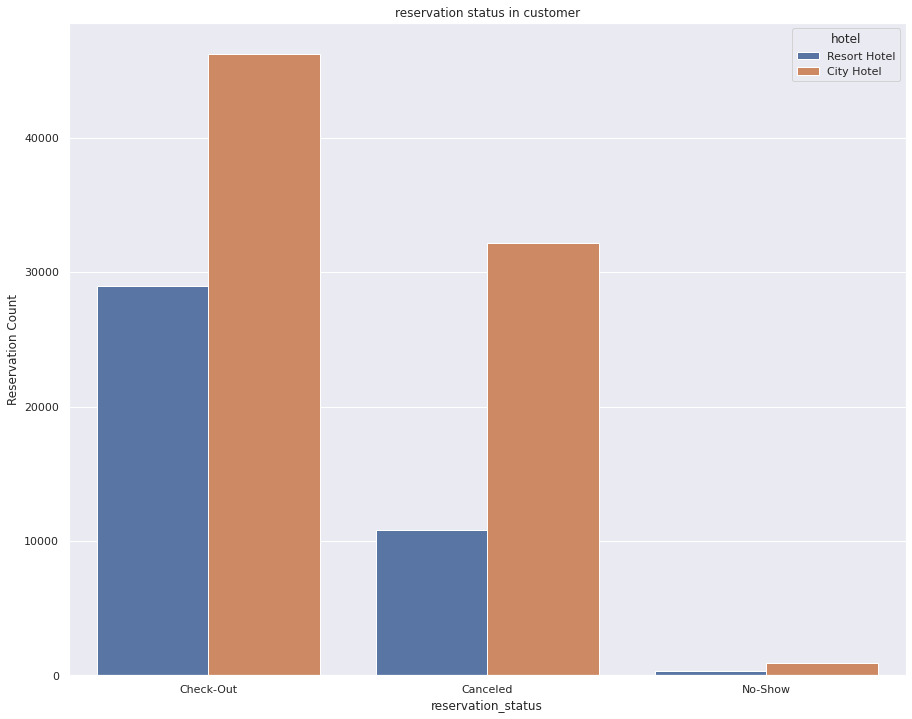

In [107]:
#sns.countplot
sns.set(rc={'figure.figsize':(15,12)})
graph=sns.countplot(x='reservation_status',hue='hotel',data=df)
graph.set(title='reservation status in customer')
graph.set_xlabel("reservation_status",fontsize=12)
graph.set_ylabel("Reservation Count",fontsize=12)

In [108]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

#Observaion
##63% customer has checked in but already departed
##36% booking was canceled by  the customer
#1% customer did not checkin and did inform the hotel was reson why

#Problem
##which adults higest reserving hotel room ?


##checking  the adult travel acount

Text(0, 0.5, 'Reservation Count')

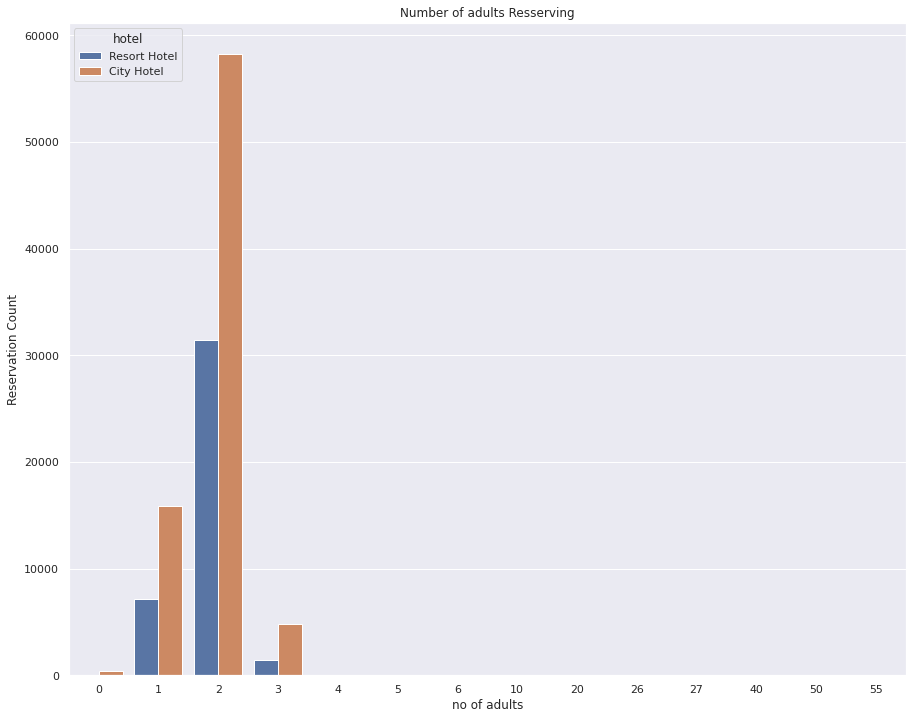

In [109]:
sns.set(rc={'figure.figsize':(15,12)})
graph=sns.countplot(x='adults',hue='hotel',data=df)
graph.set(title='Number of adults Resserving')
graph.set_xlabel("no of adults",fontsize=12)
graph.set_ylabel("Reservation Count",fontsize=12)

In [110]:
df['adults'].value_counts(normalize=True)

2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
27    0.000017
20    0.000017
5     0.000017
40    0.000008
50    0.000008
55    0.000008
6     0.000008
10    0.000008
Name: adults, dtype: float64

#observation
##19% around booked as single room
##75% around booked as couples room
##5% around booked as family room



##create a new column


In [111]:
df['total_family'] = df['adults'] + df['children'] + df['babies']

In [112]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_as_numbers,total_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0


#

#Problem 
## How many family book room as couple, with single child or more than one child ?

Text(0, 0.5, 'Reservation Count')

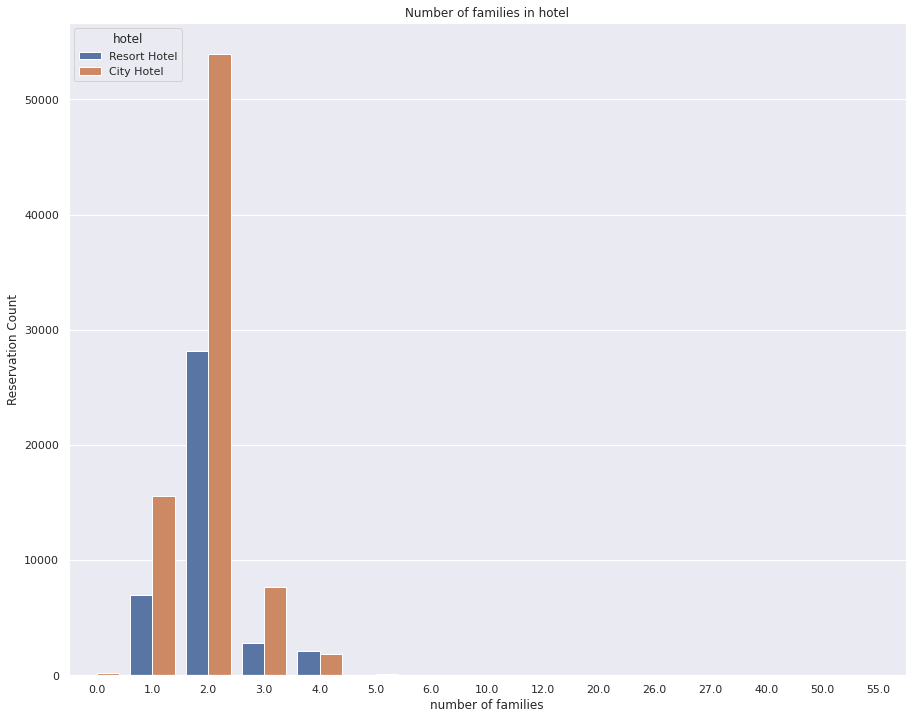

In [113]:
sns.set(rc={'figure.figsize':(15,12)})
graph=sns.countplot(x='total_family',hue='hotel',data=df)
graph.set(title='Number of families in hotel')
graph.set_xlabel("number of families",fontsize=12)
graph.set_ylabel("Reservation Count",fontsize=12)

In [114]:
df['total_family'].value_counts(normalize=True)

2.0     0.687250
1.0     0.189143
3.0     0.087900
4.0     0.032910
0.0     0.001508
5.0     0.001148
26.0    0.000042
12.0    0.000017
27.0    0.000017
20.0    0.000017
10.0    0.000017
40.0    0.000008
50.0    0.000008
55.0    0.000008
6.0     0.000008
Name: total_family, dtype: float64

observation
##68% couple family booking hotel room and 19% familis with 1 child and 9%family  with 2 children booking room and 2% more than 2 children family booking room

#Problem
##Hightest number of days customer stay in hotel ?

In [115]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [116]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_as_numbers,total_family,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0,2


Text(0, 0.5, 'Count')

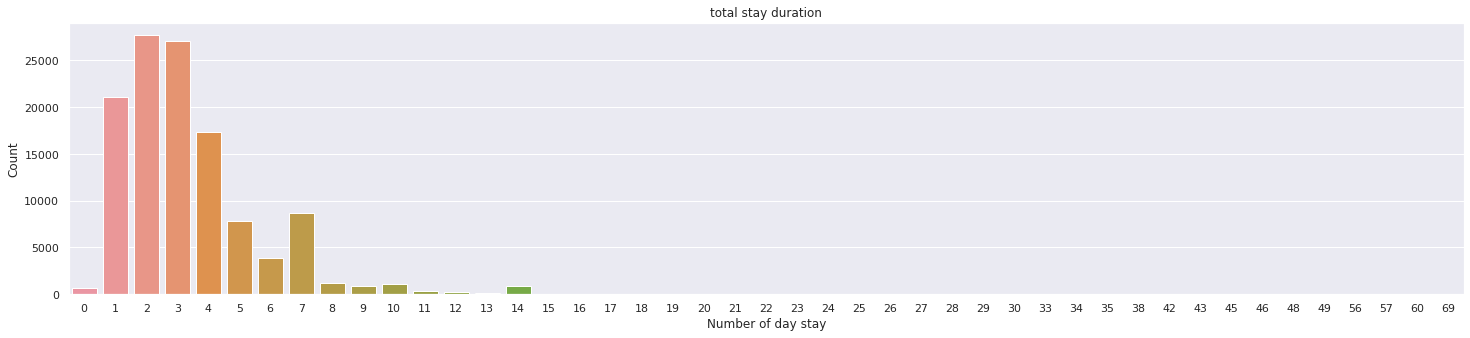

In [117]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['total_stay'])
plt.title('total stay duration')
plt.xlabel('Number of day stay')
plt.ylabel('Count')

In [118]:
df['total_stay'].value_counts(normalize=True)

2     0.231535
3     0.226786
1     0.176062
4     0.145598
7     0.072494
5     0.065198
6     0.032306
8     0.009724
10    0.009540
14    0.007672
9     0.007044
0     0.005989
11    0.003317
12    0.001868
13    0.001189
15    0.000628
21    0.000595
16    0.000335
25    0.000310
18    0.000293
28    0.000293
19    0.000184
17    0.000168
29    0.000117
20    0.000117
22    0.000117
30    0.000109
23    0.000067
24    0.000050
26    0.000050
27    0.000042
35    0.000042
42    0.000034
33    0.000025
56    0.000017
34    0.000008
57    0.000008
49    0.000008
48    0.000008
69    0.000008
38    0.000008
45    0.000008
60    0.000008
46    0.000008
43    0.000008
Name: total_stay, dtype: float64

#Observation
#these graph show that the higehst customer book room for  2 days
##24% customer book room for 2 days 
##22% cusomer book room for 3  days
##17% customer book room for 1 days
##14% customer book room for 4 days
##8% customer book room for 7 days

#Problem 
##what is the optimal stay of lenght to get the best daily rate ?

In [119]:
def total_price(total_stay,adr):
   total_price = 0
   if total_stay > 0:
     total_price = total_stay*adr
   return total_price  




In [120]:
df['total_price'] = df.apply(lambda x: total_price(x['total_stay'], x['adr']),axis=1)

In [121]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_as_numbers,total_family,total_stay,total_price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0,2,196.0


Text(0.5, 1.0, 'People staying according to hotel')

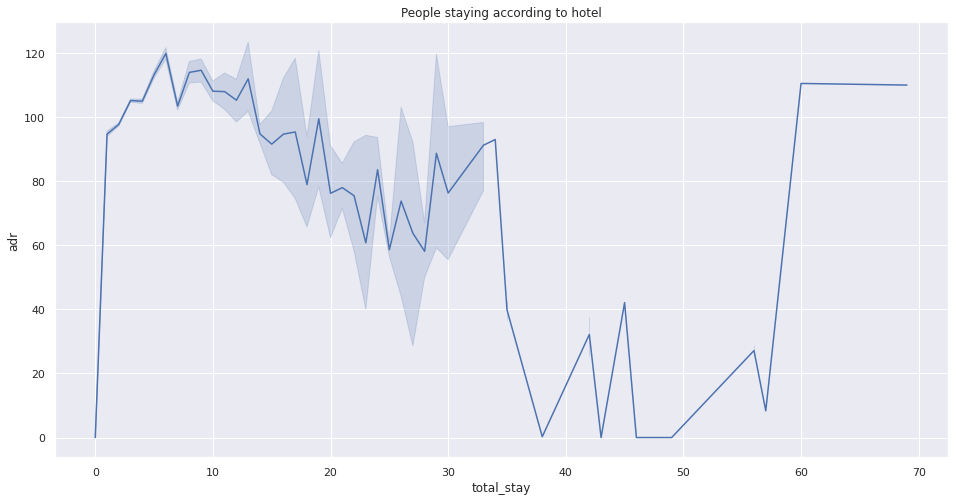

In [122]:
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=df)
plt.title('People staying according to hotel')

#Observation


#Problem
##what is the percentage distribution of required_car_parking_spaces ?

Text(0, 0.5, 'Count')

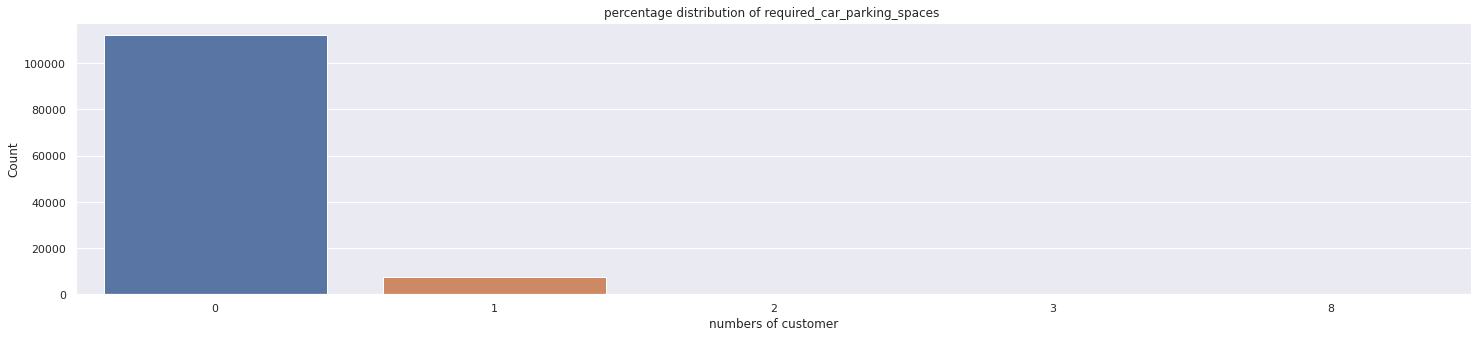

In [123]:
# required_car_parking_spaces distribution
plt.figure(figsize=(25,5))
sns.countplot(x=df['required_car_parking_spaces'])
plt.title('percentage distribution of required_car_parking_spaces ')
plt.xlabel('numbers of customer')
plt.ylabel('Count')

In [124]:
df['required_car_parking_spaces'].value_counts(normalize=True)


0    0.937884
1    0.061839
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

#observation
##93% cutomer did not required the parking space only 7% customer requried 1 parking spaces

#Problem
##Which Distribution channel is mostly used for hotel bookings?

Text(0, 0.5, 'Count')

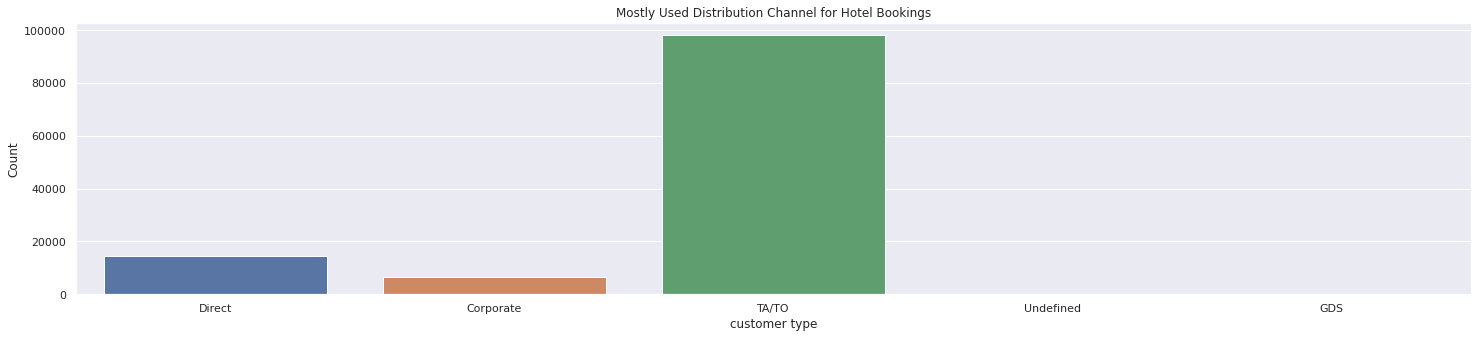

In [125]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['distribution_channel'])
plt.title('Mostly Used Distribution Channel for Hotel Bookings')
plt.xlabel('customer type')
plt.ylabel('Count')

In [126]:
df['distribution_channel'].value_counts(normalize=True)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

#Observation


## TA & TO distribution_chanel  is mostly used for hotel booking
##82% TA&TO(Travel Agents,Tour opretors) 
##12% Direct booking
##5% corporate booking

#Problem
##Relationship between adr(average daily rate) and total_stay ?
 

In [141]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

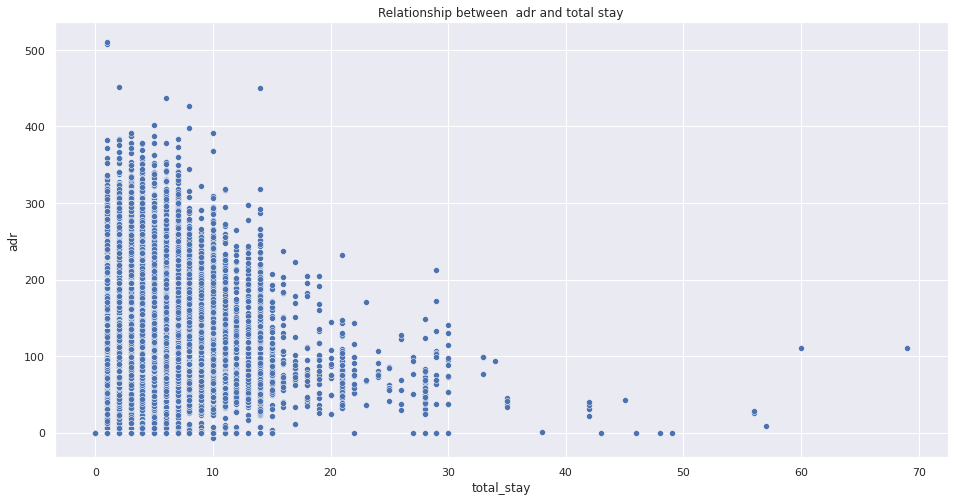

In [142]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['total_stay'],y=df['adr'])
plt.title('Relationship between  adr and total stay')

#Observation
##Above scatter plot show that if the number of days  for stays increase for customer then Adr(Average daily rate) decrease .
#Thus for longer stays customer get good adr 

#Problem
##Which agent did the most bookings ?

In [137]:
## return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 
top_bookings=highest_bookings[:10]


Text(0.5, 1.0, 'Most Bookings Made by the agent')

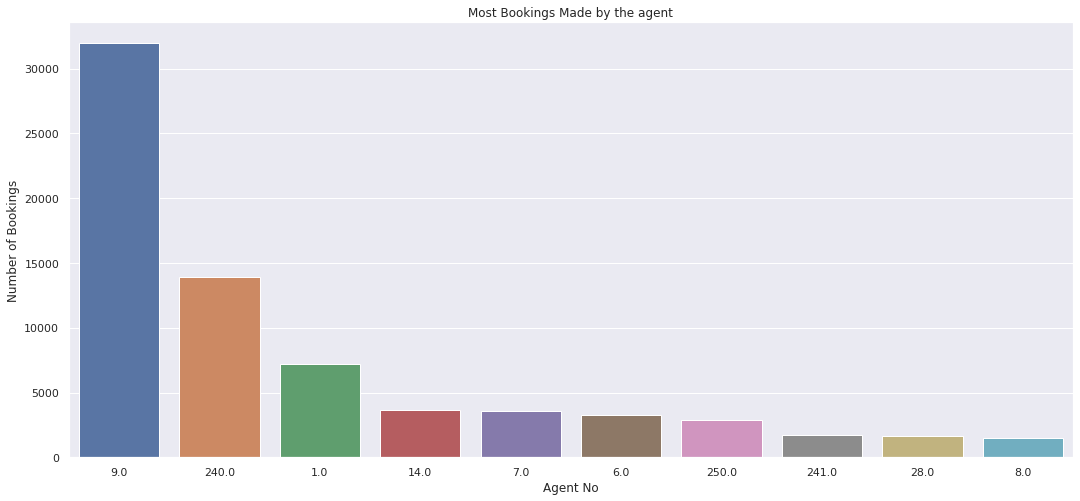

In [138]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_bookings['agent'],y=top_bookings['Most_Bookings'],order=top_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


In [139]:
top_bookings

,agent,Most_Bookings
8,9.0,31961
173,240.0,13922
0,1.0,7191
13,14.0,3640
6,7.0,3539
5,6.0,3290
182,250.0,2870
174,241.0,1721
26,28.0,1666
7,8.0,1514
